In [1]:
import pandas as pd
import glob, os   
pathFiles = r'data/Datasets_Healthy_Older_People/dataset'
all_files = glob.glob(os.path.join(pathFiles, "*"))
#df = pd.concat((pd.read_csv(f, header=0) for f in all_files), axis=0, ignore_index=True)
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header= None, names=['timeSec', 'accFrontal', 'accVertical', 'accLateral', 'antennaID', 'rssi', 'phase', 'frequency', 'activity'])
    li.append(df)
dataAll = pd.concat(li, axis=0, ignore_index=True)

In [6]:
dataAll.head(10)

,timeSec1,accFrontal,accVertical,accLateral,antennaID,rssi,phase,frequency,activity
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1
5,3.25,0.34238,0.96229,-0.059296,4,-56.5,1.2563,924.75,1
6,4.00,0.30721,0.99674,-0.070699,1,-63.5,3.8718,922.75,1
7,5.00,0.27203,0.99674,-0.093505,1,-64.0,2.4943,924.25,1
8,5.50,0.23685,1.03120,-0.127710,1,-64.5,2.0080,924.75,1
9,6.00,0.23685,1.03120,-0.127710,1,-66.0,1.1904,925.75,1


In [32]:
len(dataAll)

75128

In [4]:
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)  
kmeans.fit(dataAll)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
print(np.round(kmeans.cluster_centers_,))

[[199.   1.   0.  -0.   2. -58.   3. 923.   2.]
 [665.   1.   0.  -1.   3. -58.   3. 922.   3.]]


In [16]:
from sklearn.metrics import silhouette_score
print(silhouette_score(dataAll, kmeans.labels_))

0.6118781883792763


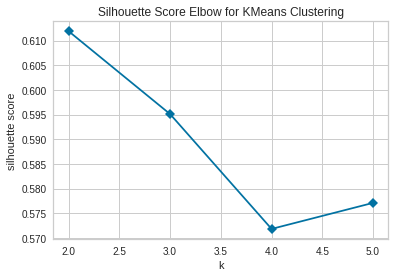

In [20]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
kmeans = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(dataAll)    
visualizer.poof()   

In [38]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
kmeans = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k=(5,12), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(dataAll)    
visualizer.poof()  

KeyboardInterrupt: 

In [43]:
import sklearn
dataAll1, dataAll2= sklearn.model_selection.train_test_split(dataAll, test_size=0.4, random_state=0)

In [44]:
print(len(dataAll1))
print(len(dataAll2))

45076
30052


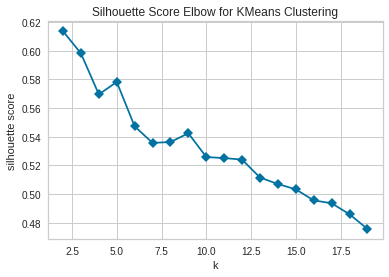

In [45]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
kmeans = KMeans(random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(dataAll2)    
visualizer.poof() 

In [ ]:
#improvement one hot encoding
